In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [79]:
import yfinance as yf
import datetime as dt

stock = "NVDA"
start = dt.datetime(2021, 12, 24)
end = dt.datetime(2024, 12, 25)

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [80]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-27,29.660000,31.087000,29.639999,30.945000,30.893621,403686000
2021-12-28,31.312000,31.330000,30.011999,30.322001,30.271654,420591000
2021-12-29,30.273001,30.548000,29.365999,30.000999,29.951191,343139000
2021-12-30,29.827000,30.457001,29.540001,29.586000,29.536877,308864000
2021-12-31,29.674000,30.030001,29.330999,29.410999,29.362167,266530000


In [81]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-12-18,133.860001,136.699997,128.279999,128.910004,128.910004,277444500
2024-12-19,131.759995,134.029999,129.550003,130.679993,130.679993,209719200
2024-12-20,129.809998,135.279999,128.220001,134.699997,134.699997,306528600
2024-12-23,136.279999,139.789993,135.119995,139.669998,139.669998,176053500
2024-12-24,140.000000,141.899994,138.649994,140.220001,140.220001,105157000


In [82]:
data.shape

(754, 6)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2021-12-27 to 2024-12-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       754 non-null    float64
 1   High       754 non-null    float64
 2   Low        754 non-null    float64
 3   Close      754 non-null    float64
 4   Adj Close  754 non-null    float64
 5   Volume     754 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.2 KB


In [84]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [85]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,754.000000,754.000000,754.000000,754.000000,754.000000,7.540000e+02
mean,53.822846,54.824844,52.718905,53.815231,53.795762,4.654494e+08
std,41.835696,42.520053,40.956352,41.755784,41.758542,1.655455e+08
min,10.971000,11.735000,10.813000,11.227000,11.215970,1.051570e+08
25%,19.519250,20.059751,18.986501,19.594499,19.565298,3.633662e+08
50%,41.393499,42.147001,40.575998,41.274000,41.258673,4.507785e+08
75%,87.162498,88.791498,85.726498,87.109503,87.088894,5.502148e+08
max,149.350006,152.889999,146.259995,148.880005,148.869751,1.543911e+09


In [86]:
data = data.reset_index()

In [87]:
# Condlestick data plot
import plotly.graph_objects as go

In [88]:

plot = go.Figure(data=[go.Candlestick(x=data['Date'], open = data['Open'], close = data['Close'], high = data['High'], low = data['Low'])])

plot.update_layout(title = 'Stock Price Chart', xaxis_title = 'Date', yaxis_title = 'Price')
plot.show()

In [89]:
csv_data = data.to_csv("nvidia.csv")

csv_data_reader = pd.read_csv("nvidia.csv")

plot2 = go.Figure(data=[go.Candlestick(x=csv_data_reader['Date'], open = csv_data_reader['Open'], close = csv_data_reader['Close'], high = csv_data_reader['High'], low = data['Low'])])

plot2.update_layout(xaxis_rangeslider_visible=False)

plot2.show()

In [90]:
df = data.drop(['Date', 'Adj Close'], axis = 1)

In [91]:
df.tail()

,Open,High,Low,Close,Volume
749,133.860001,136.699997,128.279999,128.910004,277444500
750,131.759995,134.029999,129.550003,130.679993,209719200
751,129.809998,135.279999,128.220001,134.699997,306528600
752,136.279999,139.789993,135.119995,139.669998,176053500
753,140.000000,141.899994,138.649994,140.220001,105157000


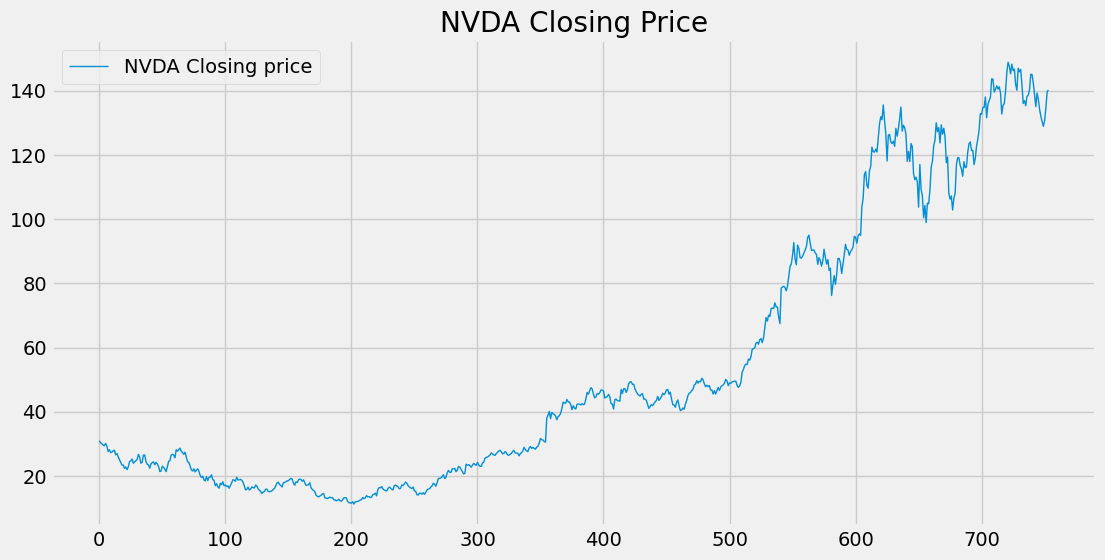

In [92]:
# CLOSING PRICES

plt.figure(figsize=(12,6))
plt.plot(data['Close'], label = f'{stock} Closing price', linewidth= 1)
plt.title(f'{stock} Closing Price')
plt.legend()
plt.show()

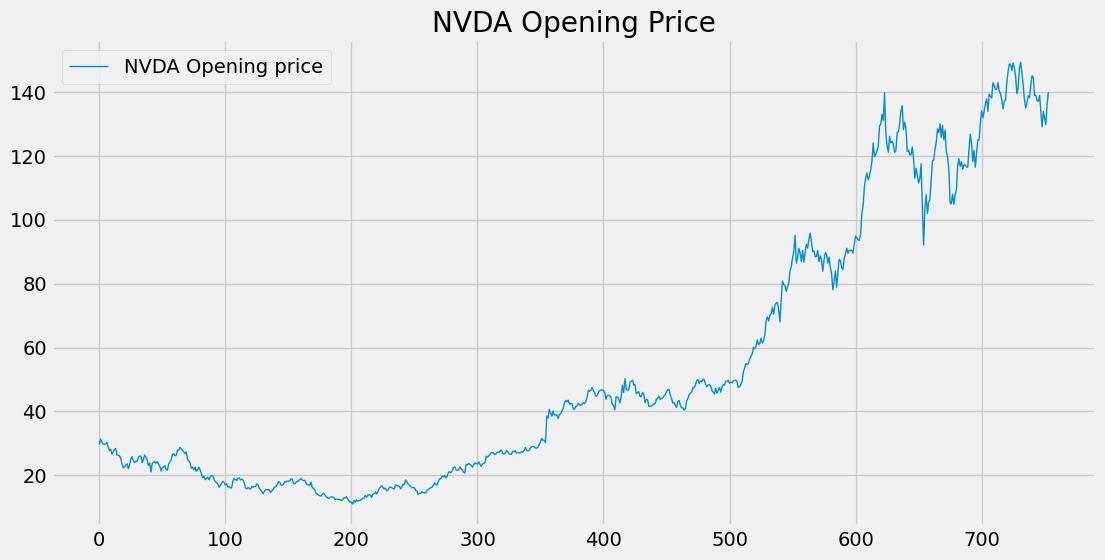

In [93]:
# OPENING PRICES

plt.figure(figsize=(12,6))
plt.plot(data['Open'], label = f'{stock} Opening price', linewidth= 1)
plt.title(f'{stock} Opening Price')
plt.legend()
plt.show()

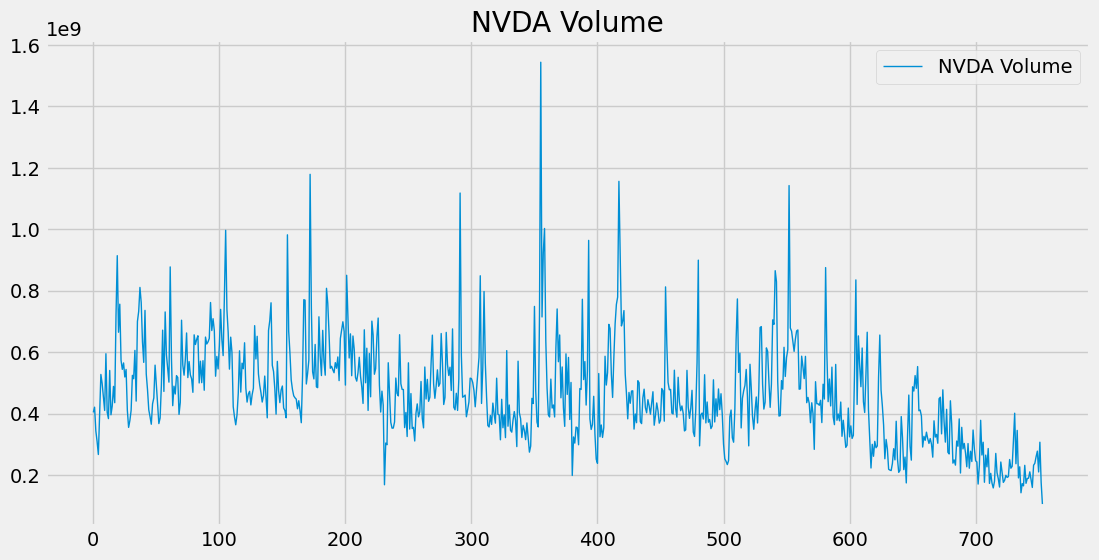

In [94]:
# VOLUME OVER TIME


plt.figure(figsize=(12,6))
plt.plot(data['Volume'], label = f'{stock} Volume', linewidth= 1)
plt.title(f'{stock} Volume')
plt.legend()
plt.show()

In [95]:
# Moving Average
# [10, 20, 30, 40, 50, 60, 70, 80, 90]
# moving average for last 5 days -> null null null null 30.0 40.0 50.0

temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [96]:
import pandas as pd
df01 = pd.DataFrame(temp_data)

In [97]:
df01.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [98]:
data_rolled_100 = data.Close.rolling(100).mean()
data_rolled_200 = data.Close.rolling(200).mean()

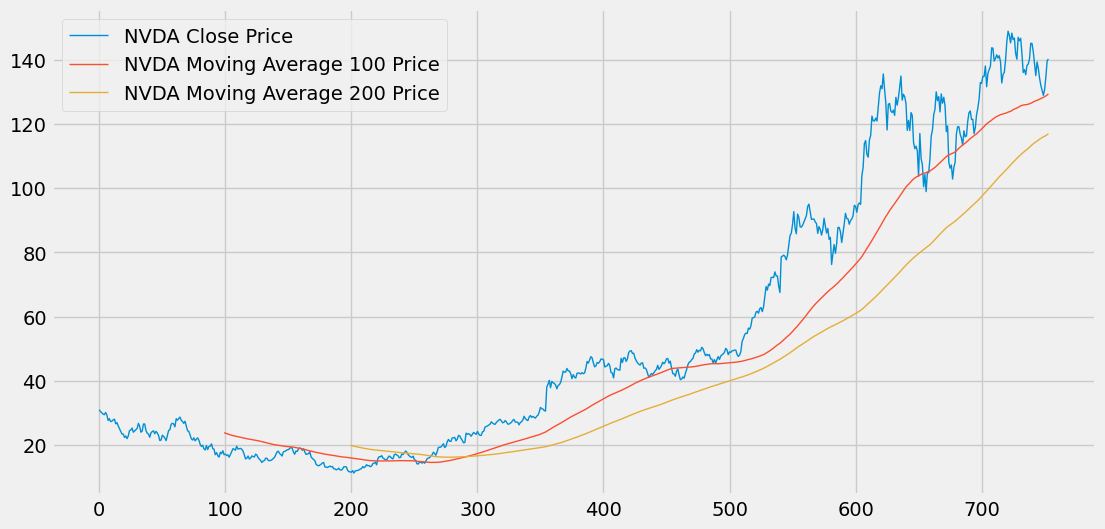

In [99]:
plt.figure(figsize=(12, 6))
plt.plot(data.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(data_rolled_100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(data_rolled_200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [100]:
ema100 = data.Close.ewm(span=100, adjust = False).mean()
ema200 = data['Close'].ewm(span=200, adjust = False).mean()

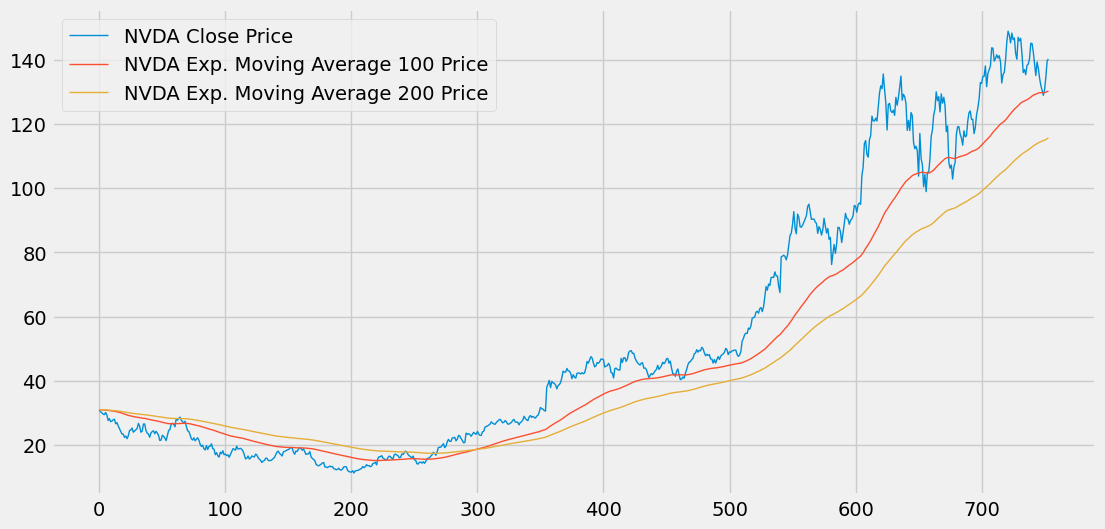

In [101]:
plt.figure(figsize=(12, 6))
plt.plot(data.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [102]:
# CREATE THE MODEL

data_training = pd.DataFrame(data['Close'][0:int(len(data)*0.70)])
data_testing = pd.DataFrame(data['Close'][int(len(data)*0.70): int(len(data))])

In [103]:
data_training.shape

(527, 1)

In [105]:
data_testing.shape

(227, 1)

In [107]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [113]:
data_training_array = scaler.fit_transform(data_training)
data_training_array.shape[0]

527

In [116]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)